In [7]:
# Add your imports here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

2022-07-08 18:38:31.122345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 18:38:31.122384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
# pip install keras

In [9]:
import sys

# !$sys.executable -m pip install tensorflow

In [10]:
# Read data
data = pd.read_csv("Data/heart_2020_cleaned.csv")

In [11]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [12]:
data["Smoking"] = data["Smoking"].map(dict(Yes=1, No=0))
data["AlcoholDrinking"] = data["AlcoholDrinking"].map(dict(Yes=1, No=0))
data["DiffWalking"] = data["DiffWalking"].map(dict(Yes=1, No=0))
data["Stroke"] = data["Stroke"].map(dict(Yes=1, No=0))
# data["Diabetic"] = data["Diabetic"].map(dict(Yes=1, No=0))
data["PhysicalActivity"] = data["PhysicalActivity"].map(dict(Yes=1, No=0))
data["Asthma"] = data["Asthma"].map(dict(Yes=1, No=0))
data["KidneyDisease"] = data["KidneyDisease"].map(dict(Yes=1, No=0))
data["SkinCancer"] = data["SkinCancer"].map(dict(Yes=1, No=0))
data["Sex"] = data["Sex"].map(dict(Female=1, Male=0))
data["HeartDisease"] = data["HeartDisease"].map(dict(Yes=1, No=0))
data["AgeCategory"] = data["AgeCategory"].map({"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12})
data["GenHealth"] = data["GenHealth"].map({"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4})

In [13]:
race_dummies = pd.get_dummies(data["Race"])
diabetes_dummies = pd.get_dummies(data['Diabetic'])

In [14]:
data = pd.concat([data, race_dummies], axis = 1)
data = pd.concat([data, diabetes_dummies], axis = 1)
data = data.drop(columns = 'Race')
data = data.drop(columns = 'Diabetic')
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'American Indian/Alaskan Native', 'Asian', 'Black',
       'Hispanic', 'Other', 'White', 'No', 'No, borderline diabetes', 'Yes',
       'Yes (during pregnancy)'],
      dtype='object')

Here is a markdown cell



In [15]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [16]:
data.isna().sum()

HeartDisease                      0
BMI                               0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
PhysicalHealth                    0
MentalHealth                      0
DiffWalking                       0
Sex                               0
AgeCategory                       0
PhysicalActivity                  0
GenHealth                         0
SleepTime                         0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
No                                0
No, borderline diabetes           0
Yes                               0
Yes (during pregnancy)            0
dtype: int64

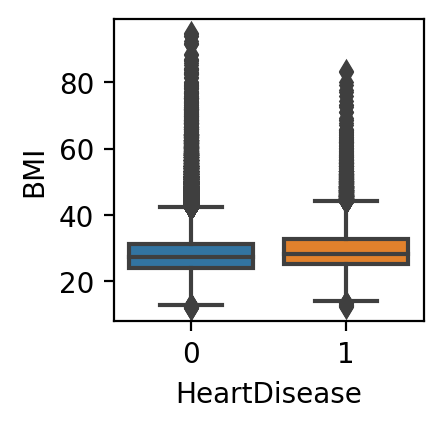

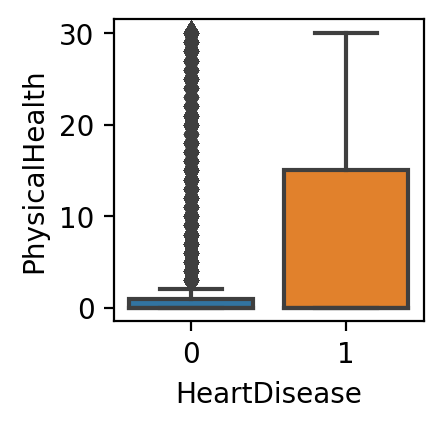

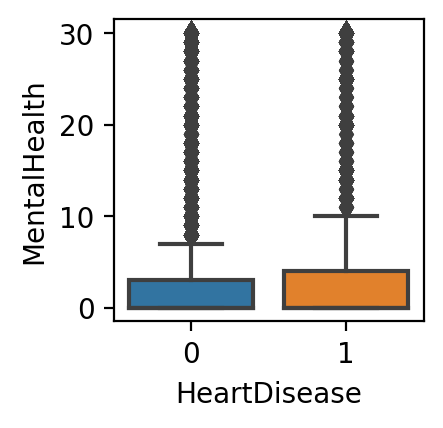

In [11]:
numeric_variables = ['BMI', 'PhysicalHealth', 'MentalHealth']
for i in numeric_variables:
    plt.figure(figsize=(2, 2), dpi=200)
    sns.boxplot(data = data, x = 'HeartDisease', y = i)
    plt.show()

In [12]:
import plotly.express as px

In [13]:
hd_yes = data[data['HeartDisease'] == "Yes"]
px.pie(hd_yes, names = "AgeCategory")

In [14]:
# this visualization shows the pecentage of people in our data set with heart disease in each age category. It shows that the amount of people with heart disease gradually goes down with the exception of one outlier (the 65-69 category).

In [15]:
df = data[~data.isin(['?'])]

HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                         int64
Sex                                 int64
AgeCategory                         int64
PhysicalActivity                    int64
GenHealth                           int64
SleepTime                         float64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
American Indian/Alaskan Native      uint8
Asian                               uint8
Black                               uint8
Hispanic                            uint8
Other                               uint8
White                               uint8
No                                  uint8
No, borderline diabetes           

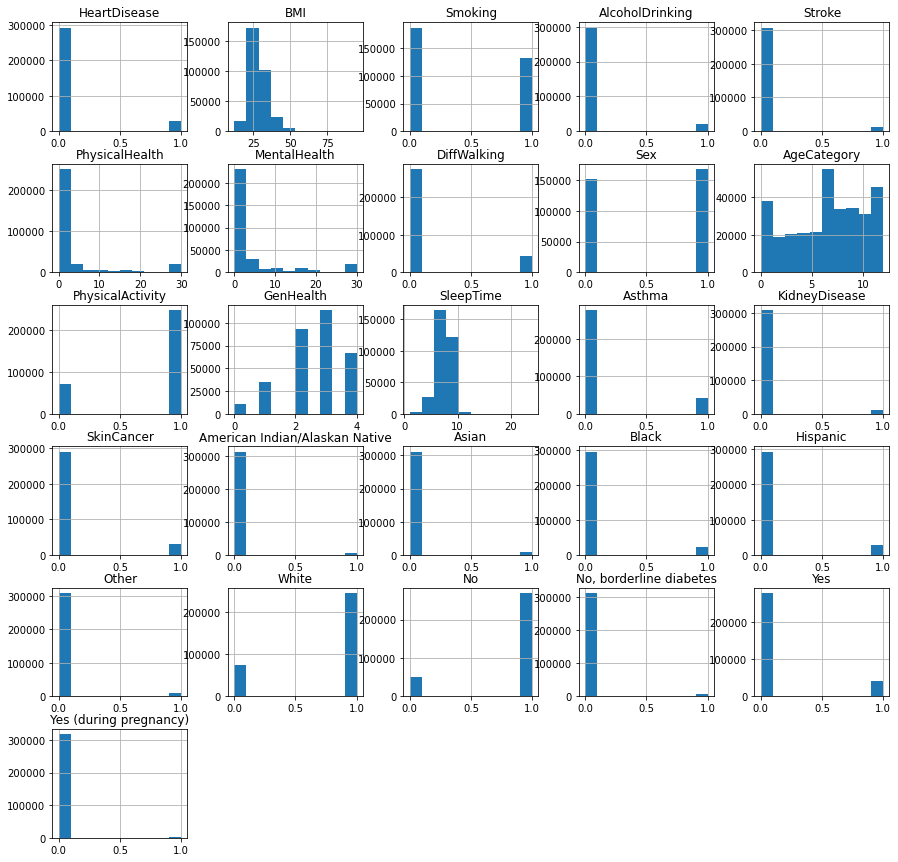

In [16]:
# transform data to numeric because ca and thal are object datatypes
# data = df.apply(pd.to_numeric)
print(data.dtypes) # Brian- ^ Data should already be numeric
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()

In [17]:
X = data.iloc[:,1:13] # Brian- I changed the 0 to 1, we want to exclude the 'HeartDisease' column in X
y = data.iloc[:,-1]
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime
0,16.60,1,0,0,3.0,30.0,0,1,7,1,3,5.0
1,20.34,0,0,1,0.0,0.0,0,1,12,1,3,7.0
2,26.58,1,0,0,20.0,30.0,0,0,9,1,1,8.0
3,24.21,0,0,0,0.0,0.0,0,1,11,0,2,6.0
4,23.71,0,0,0,28.0,0.0,1,1,4,1,3,8.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [19]:
# There are 4 classes so we need to one-hot encode them
# Brian- don't think we need this either, 'HeartDisease' has already been encoded to 1/0
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
y_train[:5], y_test[:5]

(273991    0
 138596    0
 232113    0
 47405     0
 292723    0
 Name: Yes (during pregnancy), dtype: uint8,
 36434     0
 210071    0
 140559    0
 298924    0
 7912      0
 Name: Yes (during pregnancy), dtype: uint8)

In [17]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
#Brian- changed input_dim ^
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='softmax'))

2022-07-08 18:38:42.326402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-08 18:38:42.326443: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-08 18:38:42.326469: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ae633b5eaedf): /proc/driver/nvidia/version does not exist
2022-07-08 18:38:42.326709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'X' is not defined

In [18]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [20]:
# train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])
train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test))

NameError: name 'X_train' is not defined

In [21]:
def load_data():
    train_dataset = pd.read_csv("Data/heart_2020_cleaned.csv")
    test_dataset = pd.read_csv("Data/heart_2020_cleaned.csv")
    train_columns = train_dataset.columns
    train_predictors = train_dataset[train_columns[train_columns != 'target']]
    train_target = train_dataset['target']

    test_columns = test_dataset.columns
    test_predictors = test_dataset[test_columns[test_columns != 'target']]
    test_target = test_dataset['target']

    X_train = train_predictors
    y_train = train_target

    X_test = test_predictors
    y_test = test_target

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test

In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [24]:
X_train, y_train, X_test, y_test = load_data()

model = build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=2)

KeyError: 'target'

In [25]:
scores = model.evaluate(X_test, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')

NameError: name 'X_test' is not defined

In [27]:
def load_data():
    train_dataset = pd.read_csv("Data/heart_2020_cleaned.csv")
    test_dataset = pd.read_csv("Data/heart_2020_cleaned.csv")
    train_columns = train_dataset.columns
    train_predictors = train_dataset[train_columns[train_columns != 'target']]
    train_target = train_dataset['target']

    test_columns = test_dataset.columns
    test_predictors = test_dataset[test_columns[test_columns != 'target']]
    test_target = test_dataset['target']

    X_train = train_predictors
    y_train = train_target

    X_test = test_predictors
    y_test = test_target

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test


def build_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


X_train, y_train, X_test, y_test = load_data()

# print(f"Train \n{X_train} \n\n")
# print(f"Test \n{X_test} \n\n")
# print(f"ytrain \n{y_train} \n\n")
# print(f"ytest \n{y_test} \n\n")

model = build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=2)

scores = model.evaluate(X_test, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')

KeyError: 'target'